## Imports

In [1]:
import numpy as np
import pandas as pd

## Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import re
import warnings

warnings.filterwarnings('ignore')

## Loading Data

In [2]:
## Loading the dataset
df = pd.read_csv("googleplaystore_user_reviews.csv")
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [4]:
## Dropping missing values
df = df.dropna()

In [5]:
# Taking only the review and sentiment columns
df.drop(['App','Sentiment_Subjectivity'],axis=1,inplace=True)
df.head()

,Translated_Review,Sentiment,Sentiment_Polarity
0,I like eat delicious food. That's I'm cooking ...,Positive,1.00
1,This help eating healthy exercise regular basis,Positive,0.25
3,Works great especially going grocery store,Positive,0.40
4,Best idea us,Positive,1.00
5,Best way,Positive,1.00


In [6]:
# Importing stop words
nltk.download("stopwords")
nltk.download("punkt")
stop_words = nltk.corpus.stopwords.words('english') + list(string.punctuation)

[nltk_data] Downloading package stopwords to /Users/ankur/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/ankur/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
## Count number of words per review
df['Num_words'] = df['Translated_Review'].apply(lambda x : len([x for x in x.split()]))
df.head()

,Translated_Review,Sentiment,Sentiment_Polarity,Num_words,Num_stopwords
0,I like eat delicious food. That's I'm cooking ...,Positive,1.00,21,2
1,This help eating healthy exercise regular basis,Positive,0.25,7,1
3,Works great especially going grocery store,Positive,0.40,6,0
4,Best idea us,Positive,1.00,3,0
5,Best way,Positive,1.00,2,0


In [10]:
## Count of number of special characters
df['Num_special_char'] = df['Translated_Review'].apply(lambda x : len([x for x in x.split() if x in '[\w\s]']))
df.head()

,Translated_Review,Sentiment,Sentiment_Polarity,Num_words,Num_stopwords,Num_special_char
0,I like eat delicious food. That's I'm cooking ...,Positive,1.00,21,2,0
1,This help eating healthy exercise regular basis,Positive,0.25,7,1,0
3,Works great especially going grocery store,Positive,0.40,6,0,0
4,Best idea us,Positive,1.00,3,0,0
5,Best way,Positive,1.00,2,0,0


In [11]:
## Count number of characters(without white space)
df['Num_chars'] = df['Translated_Review'].apply(lambda x : len(''.join([x for x in x.split()])))
df.head()

,Translated_Review,Sentiment,Sentiment_Polarity,Num_words,Num_stopwords,Num_special_char,Num_chars
0,I like eat delicious food. That's I'm cooking ...,Positive,1.00,21,2,0,102
1,This help eating healthy exercise regular basis,Positive,0.25,7,1,0,41
3,Works great especially going grocery store,Positive,0.40,6,0,0,37
4,Best idea us,Positive,1.00,3,0,0,10
5,Best way,Positive,1.00,2,0,0,7


In [12]:
df.describe()

,Sentiment_Polarity,Num_words,Num_stopwords,Num_special_char,Num_chars
count,37427.000000,37427.000000,37427.000000,37427.000000,37427.000000
mean,0.182171,18.350603,2.513106,0.000641,95.861303
std,0.351318,16.647227,3.398938,0.031008,88.669271
min,-1.000000,1.000000,0.000000,0.000000,2.000000
25%,0.000000,6.000000,1.000000,0.000000,28.000000
50%,0.150000,14.000000,2.000000,0.000000,73.000000
75%,0.400000,26.000000,3.000000,0.000000,139.000000
max,1.000000,345.000000,76.000000,3.000000,2369.000000


In [13]:
## Converting to lower case
df['Translated_Review'] = df['Translated_Review'].apply(lambda x : x.lower())
df.head()

,Translated_Review,Sentiment,Sentiment_Polarity,Num_words,Num_stopwords,Num_special_char,Num_chars
0,i like eat delicious food. that's i'm cooking ...,Positive,1.00,21,2,0,102
1,this help eating healthy exercise regular basis,Positive,0.25,7,1,0,41
3,works great especially going grocery store,Positive,0.40,6,0,0,37
4,best idea us,Positive,1.00,3,0,0,10
5,best way,Positive,1.00,2,0,0,7


In [14]:
## removing punctuation\
df['Translated_Review'] = df['Translated_Review'].str.replace('[^\w\s]','')
df.head()

,Translated_Review,Sentiment,Sentiment_Polarity,Num_words,Num_stopwords,Num_special_char,Num_chars
0,i like eat delicious food thats im cooking foo...,Positive,1.00,21,2,0,102
1,this help eating healthy exercise regular basis,Positive,0.25,7,1,0,41
3,works great especially going grocery store,Positive,0.40,6,0,0,37
4,best idea us,Positive,1.00,3,0,0,10
5,best way,Positive,1.00,2,0,0,7


In [15]:
## remove stopwords
df['Translated_Review'] = df['Translated_Review'].apply(lambda x : ' '.join(x for x in x.split() if x not in stop_words))
df.head()

,Translated_Review,Sentiment,Sentiment_Polarity,Num_words,Num_stopwords,Num_special_char,Num_chars
0,like eat delicious food thats im cooking food ...,Positive,1.00,21,2,0,102
1,help eating healthy exercise regular basis,Positive,0.25,7,1,0,41
3,works great especially going grocery store,Positive,0.40,6,0,0,37
4,best idea us,Positive,1.00,3,0,0,10
5,best way,Positive,1.00,2,0,0,7


In [16]:
## remove numbers
df['Translated_Review'] = df['Translated_Review'].apply(lambda x : ' '.join(x for x in x.split() if x.isdigit()==False))
df.head()

,Translated_Review,Sentiment,Sentiment_Polarity,Num_words,Num_stopwords,Num_special_char,Num_chars
0,like eat delicious food thats im cooking food ...,Positive,1.00,21,2,0,102
1,help eating healthy exercise regular basis,Positive,0.25,7,1,0,41
3,works great especially going grocery store,Positive,0.40,6,0,0,37
4,best idea us,Positive,1.00,3,0,0,10
5,best way,Positive,1.00,2,0,0,7


In [18]:
## Count of number of special characters
df['Num_special_char'] = df['Translated_Review'].apply(lambda x : len([x for x in x.split() if x in '[\w\s]']))
df.head()

,Translated_Review,Sentiment,Sentiment_Polarity,Num_words,Num_stopwords,Num_special_char,Num_chars
0,like eat delicious food thats im cooking food ...,Positive,1.00,21,0,0,102
1,help eating healthy exercise regular basis,Positive,0.25,7,0,0,41
3,works great especially going grocery store,Positive,0.40,6,0,0,37
4,best idea us,Positive,1.00,3,0,0,10
5,best way,Positive,1.00,2,0,0,7


In [19]:
df.describe()

,Sentiment_Polarity,Num_words,Num_stopwords,Num_special_char,Num_chars
count,37427.000000,37427.000000,37427.0,37427.000000,37427.000000
mean,0.182171,18.350603,0.0,0.000935,95.861303
std,0.351318,16.647227,0.0,0.033883,88.669271
min,-1.000000,1.000000,0.0,0.000000,2.000000
25%,0.000000,6.000000,0.0,0.000000,28.000000
50%,0.150000,14.000000,0.0,0.000000,73.000000
75%,0.400000,26.000000,0.0,0.000000,139.000000
max,1.000000,345.000000,0.0,3.000000,2369.000000


In [20]:
# Stem every word to it's root word
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Translated_Review'] = df['Translated_Review'].apply(lambda x : ' '.join(st.stem(x) for x in x.split()))
df.head()

,Translated_Review,Sentiment,Sentiment_Polarity,Num_words,Num_stopwords,Num_special_char,Num_chars
0,like eat delici food that im cook food case be...,Positive,1.00,21,0,0,102
1,help eat healthi exercis regular basi,Positive,0.25,7,0,0,41
3,work great especi go groceri store,Positive,0.40,6,0,0,37
4,best idea us,Positive,1.00,3,0,0,10
5,best way,Positive,1.00,2,0,0,7


In [21]:
most_common = nltk.FreqDist(' '.join(df['Translated_Review']).split()).most_common(2000)

In [22]:
processed_features = df['Translated_Review']
labels = df['Sentiment']

In [23]:
## Creating TFIDF Matrix to convert the reviews into a set of vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [24]:
# Splitting dataset into Training and Test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(processed_features,labels,test_size = 0.3)

## Naive-Bayes

In [25]:
# Naive-Bayes 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
model.score(x_train, y_train)

0.7556302007786854

## RANDOM FOREST 

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(x_train,y_train)

In [28]:
rf_pred = rf_model.predict(x_test)
rf_model.score(x_train,y_train)

0.9958775479044202

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

    Negative       0.92      0.74      0.82      2422
     Neutral       0.84      0.84      0.84      1564
    Positive       0.90      0.96      0.93      7243

    accuracy                           0.90     11229
   macro avg       0.89      0.85      0.86     11229
weighted avg       0.90      0.90      0.89     11229



([<matplotlib.axis.YTick at 0x7fe33b187ed0>,
 <a list of 3 Text yticklabel objects>)

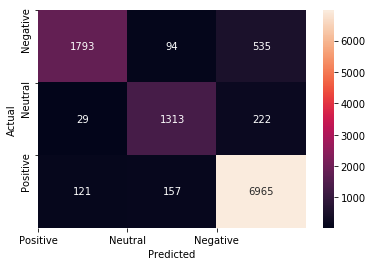

In [30]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt = '.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks = [0,1,2],labels = ['Positive','Neutral','Negative'])
plt.yticks(ticks = [0,1,2],labels = ['Negative','Neutral','Positive'])

## LOGISTIC REGRESSION MODEL

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(x_train,y_train)
lr_model.score(x_train,y_train)

0.9294984349950378

In [32]:
lr_pred = lr_model.predict(x_test)

              precision    recall  f1-score   support

    Negative       0.88      0.77      0.82      2422
     Neutral       0.83      0.80      0.82      1564
    Positive       0.91      0.95      0.93      7243

    accuracy                           0.89     11229
   macro avg       0.87      0.84      0.86     11229
weighted avg       0.89      0.89      0.89     11229



([<matplotlib.axis.YTick at 0x7fe33ae3e890>,
 <a list of 3 Text yticklabel objects>)

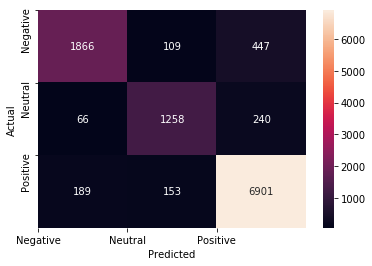

In [33]:
print(classification_report(y_test,lr_pred))
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt = '.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks = [0,1,2],labels = ['Negative','Neutral','Positive'])
plt.yticks(ticks = [0,1,2],labels = ['Negative','Neutral','Positive'])